In [261]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [262]:
def genrand(alpha):
    v=np.random.random()
    if v<alpha:
        return 0
    else:
        return 1
def my_custom_random(v):
    exclude=[]
    exclude.append(v)
    randInt = np.random.randint(0,9)
    return my_custom_random(v) if randInt in exclude else randInt 
def my_custom_random2(v1,v2):
    exclude=[]
    exclude.append(v1)
    exclude.append(v2)
    randInt = np.random.randint(0,9)
    return my_custom_random2(v1,v2) if randInt in exclude else randInt 
def count_M(z):
    c=0
    for i in range(len(z)):
        if(z[i]==2):
            c=c+1
    return c
def count_A(z):
    c=0
    for i in range(len(z)):
        if(z[i]==0):
            c=c+1
    return c


In [263]:
def create():
    N_val=60
    z=[]
    for i in range(N_val):
        val=np.random.randint(low=0,high=3)
        z.append(val)
    #0=A
    #1=U
    #2=M
    return z

def move(z,N_val,alpha):
    
    # Select random nucleosome
    
    val=np.random.randint(low=0,high=N_val)
    method=genrand(alpha)
    if (method==0):
        n2=my_custom_random(val)
        if (z[n2]==z[val]):
            pass
        elif (z[n2]==2):
            if (z[val]==0):
                z[val]=1
            else:
                z[val]=2
        elif (z[n2]==0):
            if (z[val]==2):
                z[val]=1
            else:
                z[val]=0
    else:
        dirn=np.random.randint(low=0,high=2)
        if (dirn==0) and (z[val]==0):
            z[val]=1
        elif (dirn==0) and (z[val]==1):
            z[val]=2
        elif (dirn==0) and (z[val]==2):
            z[val]=1
        elif (dirn==1) and (z[val]==1):
            z[val]=0
        elif (dirn==1) and (z[val]==0):
            z[val]=1
        elif (dirn==1) and (z[val]==2):
            z[val]=1
    return count_M(z)



In [264]:
# Create 10000 steps; system is assigned randomly among M, U and A; 
# For each step select noise or recruitment and accordingly process; 
# Plot the number of M; with time; Keep on changing alpha and plot
def generate_plot(alpha):
    steps=10000
    step=[]
    step_m=[]
    z=create()
    for i in range(10000):
        step.append(i)
        step_m.append(move(z,60,alpha))
    plt.plot(step,step_m)
    step_m=np.array(step_m)
    print(np.mean(step_m))
    




15.932
17.7671
18.4193
56.3397


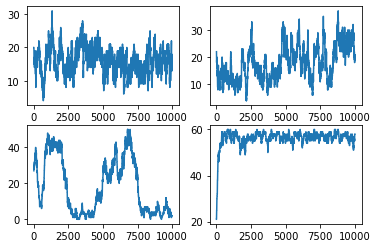

In [265]:
# Plot m values with F
def ftoalpha(f):
    alpha=f/(1+f)
    return alpha

plt.subplot(2,2,1)
generate_plot(ftoalpha(0.33))
plt.subplot(2,2,2)
generate_plot(ftoalpha(1))
plt.subplot(2,2,3)
generate_plot(ftoalpha(3))
plt.subplot(2,2,4)
generate_plot(ftoalpha(19))



## Neighbour Limited Approach

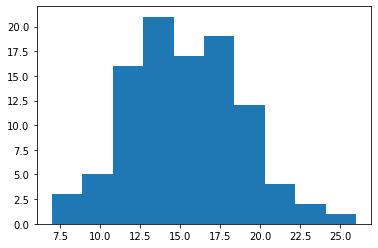

In [266]:
m_hist=[]
def generate_plot(alpha):
    steps=10000
    step=[]
    step_m=[]
    z=create()
    for i in range(10000):
        step.append(i)
        step_m.append(move(z,60,alpha))
    #plt.plot(step,step_m);
    step_m=np.array(step_m)
    #print(np.mean(step_m))
    return step_m[-1]
    
for i in range(100):
    v=generate_plot(ftoalpha(0.33))
    m_hist.append(v)
plt.hist(m_hist)
m_hist=[]


    

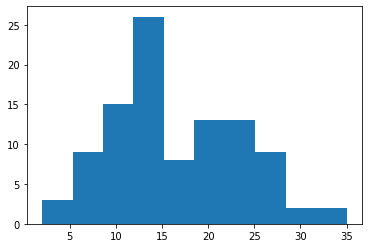

In [267]:
m_hist=[]
for i in range(100):
    v=generate_plot(ftoalpha(1))
    m_hist.append(v)
plt.hist(m_hist);

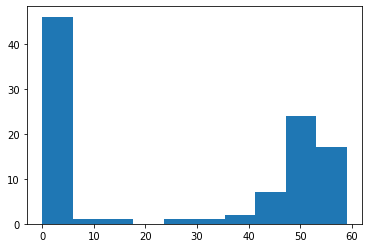

In [268]:
m_hist=[]
for i in range(100):
    v=generate_plot(ftoalpha(8))
    m_hist.append(v)
plt.hist(m_hist);

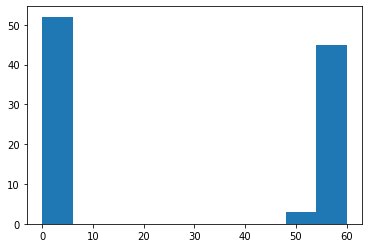

In [269]:
m_hist=[]
for i in range(100):
    v=generate_plot(ftoalpha(20))
    m_hist.append(v)
plt.hist(m_hist);

In [270]:
#G VS F graphs
def gval(z):
    m=count_M(z)
    a=count_A(z)
    return (np.abs(m-a)/(m+a))
def move(z,N_val,alpha):
    
    # Select random nucleosome
    
    val=np.random.randint(low=0,high=N_val)
    method=genrand(alpha)
    if (method==0):
        n2=my_custom_random(val)
        if (z[n2]==z[val]):
            pass
        elif (z[n2]==2):
            if (z[val]==0):
                z[val]=1
            else:
                z[val]=2
        elif (z[n2]==0):
            if (z[val]==2):
                z[val]=1
            else:
                z[val]=0
    else:
        dirn=np.random.randint(low=0,high=2)
        if (dirn==0) and (z[val]==0):
            z[val]=1
        elif (dirn==0) and (z[val]==1):
            z[val]=2
        elif (dirn==0) and (z[val]==2):
            z[val]=1
        elif (dirn==1) and (z[val]==1):
            z[val]=0
        elif (dirn==1) and (z[val]==0):
            z[val]=1
        elif (dirn==1) and (z[val]==2):
            z[val]=1
    return gval(z)


In [271]:
def generate_plot(alpha):
    steps=10000
    step=[]
    step_m=[]
    z=create()
    for i in range(10000):
        step.append(i)
        step_m.append(move(z,60,alpha))
    #plt.plot(step,step_m)
    step_m=np.array(step_m)
    return (np.mean(step_m))

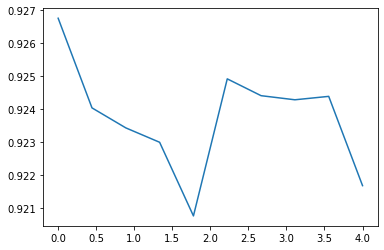

In [272]:
f_axis=np.linspace(0,4,10)
g_axis=[]
for i in f_axis:
    inter_g=[]
    for i in range(50):
        inter_g.append(generate_plot(ftoalpha(i)))

    g_axis.append(np.mean(np.array(inter_g)))
plt.plot(f_axis,g_axis)


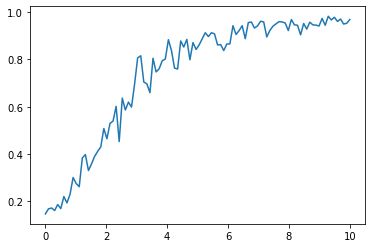

In [273]:
f_axis=np.linspace(0,10,100)
g_axis=[]
for i in f_axis:
    g_axis.append(generate_plot(ftoalpha(i)))
plt.plot(f_axis,g_axis)


In [274]:
def create():
    N_val=60
    z=[]
    for i in range(N_val):
        val=np.random.randint(low=0,high=3)
        z.append(val)
    #0=A
    #1=U
    #2=M
    return z

def move(z,N_val):
    
    alpha=0.85
    # Select random nucleosome
    
    val=np.random.randint(low=0,high=N_val)
    method=genrand(alpha)
    if (method==0):
        n2=np.random.randint(low=0,high=2)
        if(n2==0):
            if(val-1<0):
                n2=val+1
            else:
                n2=val-1
        else:
            if(val+1>59):
                n2=val-1
            else:
                n2=val+1
        #print("There")
        if (z[n2]==z[val]):
            pass
        elif (z[n2]==2):
            if (z[val]==0):
                z[val]=1
            else:
                z[val]=2
        elif (z[n2]==0):
            if (z[val]==2):
                z[val]=1
            else:
                z[val]=0
    else:
        dirn=np.random.randint(low=0,high=2)
        if (dirn==0) and (z[val]==0):
            z[val]=1
        elif (dirn==0) and (z[val]==1):
            z[val]=2
        elif (dirn==0) and (z[val]==2):
            z[val]=1
        elif (dirn==1) and (z[val]==1):
            z[val]=0
        elif (dirn==1) and (z[val]==0):
            z[val]=1
        elif (dirn==1) and (z[val]==2):
            z[val]=1
    return count_M(z)



22.6236
25


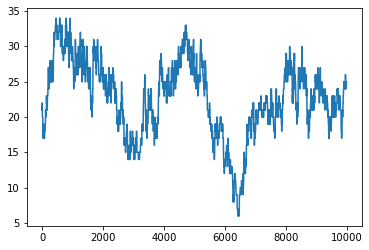

In [275]:
steps=10000
step=[]
step_m=[]
z=create()
for i in range(10000):
    step.append(i)
    step_m.append(move(z,60))
plt.plot(step,step_m)
step_m=np.array(step_m)
print(np.mean(step_m))
print(step_m[-1])

In [276]:
# P(M-A) graph
def madiff(z):
    m=count_M(z)
    a=count_A(z)
    return m-a
def move(z,N_val,alpha):
    

    # Select random nucleosome
    
    val=np.random.randint(low=0,high=N_val)
    method=genrand(alpha)
    if (method==0):
        n2=np.random.randint(low=0,high=2)
        if(n2==0):
            if(val-1<0):
                n2=val+1
            else:
                n2=val-1
        else:
            if(val+1>59):
                n2=val-1
            else:
                n2=val+1
        #print("There")
        if (z[n2]==z[val]):
            pass
        elif (z[n2]==2):
            if (z[val]==0):
                z[val]=1
            else:
                z[val]=2
        elif (z[n2]==0):
            if (z[val]==2):
                z[val]=1
            else:
                z[val]=0
    else:
        dirn=np.random.randint(low=0,high=2)
        if (dirn==0) and (z[val]==0):
            z[val]=1
        elif (dirn==0) and (z[val]==1):
            z[val]=2
        elif (dirn==0) and (z[val]==2):
            z[val]=1
        elif (dirn==1) and (z[val]==1):
            z[val]=0
        elif (dirn==1) and (z[val]==0):
            z[val]=1
        elif (dirn==1) and (z[val]==2):
            z[val]=1
    return madiff(z)

(array([ 2.,  3.,  1., 12., 16., 21., 14., 13., 10.,  5.,  2.,  0.,  0.,
         0.,  1.]),
 array([-171.282 , -142.4704, -113.6588,  -84.8472,  -56.0356,  -27.224 ,
           1.5876,   30.3992,   59.2108,   88.0224,  116.834 ,  145.6456,
         174.4572,  203.2688,  232.0804,  260.892 ]),
 <BarContainer object of 15 artists>)

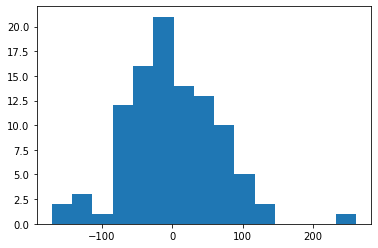

In [277]:
hist_arr1=[]
hist_arr2=[]
hist_arr3=[]
hist_arr4=[]
for i in range(100):
    steps=10000
    step=[]
    step_m1=[]
    step_m2=[]
    step_m3=[]
    step_m4=[]
    z=create()
    for i in range(10000):
        step.append(i)
        step_m1.append(move(z,60,0.15))
        step_m2.append(move(z,60,0.5))
        step_m3.append(move(z,60,0.75))
        step_m4.append(move(z,60,0.995))
    #plt.plot(step,step_m)
    step_m1=np.array(step_m1)
    step_m2=np.array(step_m2)
    step_m3=np.array(step_m3)
    step_m4=np.array(step_m4)
    hist_arr1.append((np.mean(step_m1))*60)
    hist_arr2.append((np.mean(step_m2))*60)
    hist_arr3.append((np.mean(step_m3))*60)
    hist_arr4.append((np.mean(step_m4))*60)
plt.hist(hist_arr1,bins=15)


(array([ 2.,  3.,  1., 12., 16., 20., 14., 14., 10.,  5.,  2.,  0.,  0.,
         0.,  1.]),
 array([-171.3  , -142.536, -113.772,  -85.008,  -56.244,  -27.48 ,
           1.284,   30.048,   58.812,   87.576,  116.34 ,  145.104,
         173.868,  202.632,  231.396,  260.16 ]),
 <BarContainer object of 15 artists>)

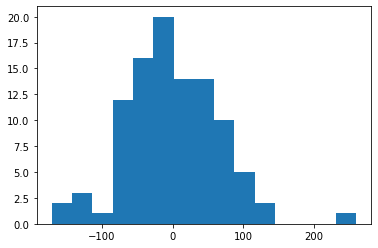

In [278]:
plt.hist(hist_arr2,bins=15)


(array([ 2.,  3.,  1., 12., 16., 20., 15., 13., 10.,  5.,  2.,  0.,  0.,
         0.,  1.]),
 array([-171.756 , -142.8856, -114.0152,  -85.1448,  -56.2744,  -27.404 ,
           1.4664,   30.3368,   59.2072,   88.0776,  116.948 ,  145.8184,
         174.6888,  203.5592,  232.4296,  261.3   ]),
 <BarContainer object of 15 artists>)

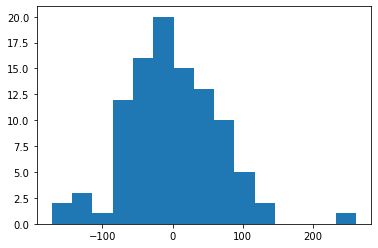

In [279]:
plt.hist(hist_arr3,bins=15)



(array([ 2.,  3.,  1., 12., 16., 20., 15., 13., 10.,  5.,  2.,  0.,  0.,
         0.,  1.]),
 array([-172.728 , -143.7152, -114.7024,  -85.6896,  -56.6768,  -27.664 ,
           1.3488,   30.3616,   59.3744,   88.3872,  117.4   ,  146.4128,
         175.4256,  204.4384,  233.4512,  262.464 ]),
 <BarContainer object of 15 artists>)

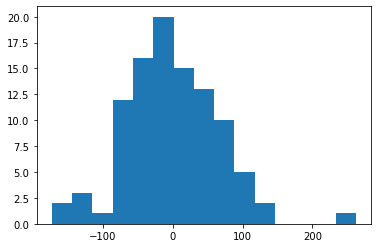

In [280]:
plt.hist(hist_arr4,bins=15)

In [281]:
def move(z,N_val,alpha):
    
    
    # Select random nucleosome
    
    val=np.random.randint(low=0,high=N_val)
    method=genrand(alpha)
    if (method==0):
        n2=np.random.randint(low=0,high=2)
        if(n2==0):
            if(val-1<0):
                n2=val+1
            else:
                n2=val-1
        else:
            if(val+1>59):
                n2=val-1
            else:
                n2=val+1
        #print("There")
        if (z[n2]==z[val]):
            pass
        elif (z[n2]==2):
            if (z[val]==0):
                z[val]=1
            else:
                z[val]=2
        elif (z[n2]==0):
            if (z[val]==2):
                z[val]=1
            else:
                z[val]=0
    else:
        dirn=np.random.randint(low=0,high=2)
        if (dirn==0) and (z[val]==0):
            z[val]=1
        elif (dirn==0) and (z[val]==1):
            z[val]=2
        elif (dirn==0) and (z[val]==2):
            z[val]=1
        elif (dirn==1) and (z[val]==1):
            z[val]=0
        elif (dirn==1) and (z[val]==0):
            z[val]=1
        elif (dirn==1) and (z[val]==2):
            z[val]=1
    return gval(z)

In [282]:
def generate_plot(alpha):
    steps=10000
    step=[]
    step_m=[]
    z=create()
    for i in range(10000):
        step.append(i)
        step_m.append(move(z,60,alpha))
    #plt.plot(step,step_m)
    step_m=np.array(step_m)
    return(np.mean(step_m))
    #print(step_m[-1])

(100,)
(100,)


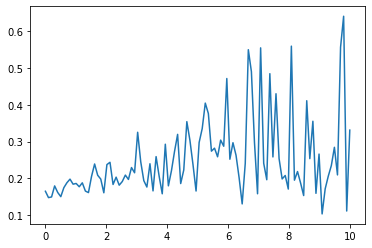

In [283]:
f_axis=np.linspace(0,10,100)
g_axis=[]
for i in f_axis:
    g_axis.append(generate_plot(ftoalpha(i)))
g_axis=np.array(g_axis)
plt.plot(f_axis,g_axis)
print(f_axis.shape)
print(g_axis.shape)


In [284]:
# Cooperativity
def create():
    N_val=60
    z=[]
    for i in range(N_val):
        val=np.random.randint(low=0,high=3)
        z.append(val)
    #0=A
    #1=U
    #2=M
    return z

def move(z,N_val,alpha):
    
    # Select random nucleosome
    
    val=np.random.randint(low=0,high=N_val)
    method=genrand(alpha)
    if (method==0):
        n2=my_custom_random(val)
        n3=my_custom_random2(val,n2)
        if(z[n2]==z[n3])and(z[n2]==0)and(z[val]!=0):
            if(z[val]==1):
                z[val]=0
            elif(z[val]==2):
                z[val]=1
        elif(z[n2]==z[n3])and(z[n2]==2)and(z[val]!=2):
            if(z[val]==1):
                z[val]=2
            elif(z[val]==0):
                z[val]=1
    else:
        dirn=np.random.randint(low=0,high=2)
        if (dirn==0) and (z[val]==0):
            z[val]=1
        elif (dirn==0) and (z[val]==1):
            z[val]=2
        elif (dirn==0) and (z[val]==2):
            z[val]=1
        elif (dirn==1) and (z[val]==1):
            z[val]=0
        elif (dirn==1) and (z[val]==0):
            z[val]=1
        elif (dirn==1) and (z[val]==2):
            z[val]=1
    return gval(z)



In [285]:
def generate_plot(alpha):
    steps=10000
    step=[]
    step_m=[]
    z=create()
    for i in range(10000):
        step.append(i)
        step_m.append(move(z,60,alpha))
    #plt.plot(step,step_m)
    step_m=np.array(step_m)
    return(np.mean(step_m))
    #print(step_m[-1])

(100,)
(100,)


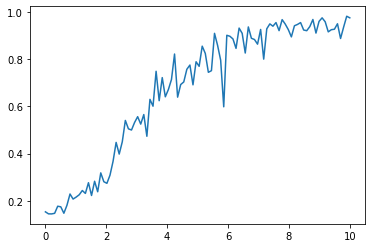

In [286]:
f_axis=np.linspace(0,10,100)
g_axis=[]
for i in f_axis:
    g_axis.append(generate_plot(ftoalpha(i)))
g_axis=np.array(g_axis)
plt.plot(f_axis,g_axis)
print(f_axis.shape)
print(g_axis.shape)


In [287]:
# Cooperativity
def create():
    N_val=60
    z=[]
    for i in range(N_val):
        val=np.random.randint(low=0,high=3)
        z.append(val)
    #0=A
    #1=U
    #2=M
    return z

def move(z,N_val,alpha):
    
    # Select random nucleosome
    
    val=np.random.randint(low=0,high=N_val)
    method=genrand(alpha)
    if (method==0):
        n2=val-1
        n3=val+1
        if (n2<0)or(n3>59):
            return gval(z)
        elif(z[n2]==z[n3])and(z[n2]==0)and(z[val]!=0):
            if(z[val]==1):
                z[val]=0
            elif(z[val]==2):
                z[val]=1
        elif(z[n2]==z[n3])and(z[n2]==2)and(z[val]!=2):
            if(z[val]==1):
                z[val]=2
            elif(z[val]==0):
                z[val]=1
    else:
        dirn=np.random.randint(low=0,high=2)
        if (dirn==0) and (z[val]==0):
            z[val]=1
        elif (dirn==0) and (z[val]==1):
            z[val]=2
        elif (dirn==0) and (z[val]==2):
            z[val]=1
        elif (dirn==1) and (z[val]==1):
            z[val]=0
        elif (dirn==1) and (z[val]==0):
            z[val]=1
        elif (dirn==1) and (z[val]==2):
            z[val]=1
    return gval(z)



In [288]:
def generate_plot(alpha):
    steps=10000
    step=[]
    step_m=[]
    z=create()
    for i in range(10000):
        step.append(i)
        step_m.append(move(z,60,alpha))
    #plt.plot(step,step_m)
    step_m=np.array(step_m)
    return(np.mean(step_m))
    #print(step_m[-1])

(100,)
(100,)


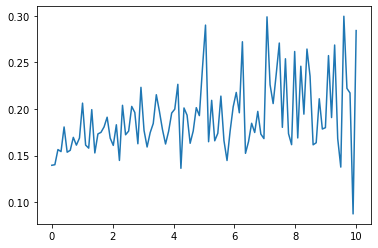

In [289]:
f_axis=np.linspace(0,10,100)
g_axis=[]
for i in f_axis:
    g_axis.append(generate_plot(ftoalpha(i)))
g_axis=np.array(g_axis)
plt.plot(f_axis,g_axis)
print(f_axis.shape)
print(g_axis.shape)


In [290]:
#DNA Replication
# Create Original Nucleosome map
def create():
    N_val=60
    z=[]
    for i in range(N_val):
        val=np.random.randint(low=0,high=3)
        z.append(val)
    #0=A
    #1=U
    #2=M
    return z
def initrepl():
    N_val=60
    z=[]
    for i in range(60):
        z.append(1)
    
    #0=A
    #1=U
    #2=M
    return z
z1=create()
z2=initrepl()


In [291]:
def move(z1,N_val,alpha):
    
    # Select random nucleosome
    
    val=np.random.randint(low=0,high=N_val)
    method=genrand(alpha)
    if (method==0):
        n2=my_custom_random(val)
        if (z1[n2]==z1[val]):
            pass
        elif (z1[n2]==2):
            if (z1[val]==0):
                z1[val]=1
            else:
                z1[val]=2
        elif (z1[n2]==0):
            if (z1[val]==2):
                z1[val]=1
            else:
                z1[val]=0
    else:
        dirn=np.random.randint(low=0,high=2)
        if (dirn==0) and (z1[val]==0):
            z1[val]=1
        elif (dirn==0) and (z1[val]==1):
            z1[val]=2
        elif (dirn==0) and (z1[val]==2):
            z1[val]=1
        elif (dirn==1) and (z1[val]==1):
            z1[val]=0
        elif (dirn==1) and (z1[val]==0):
            z1[val]=1
        elif (dirn==1) and (z1[val]==2):
            z1[val]=1
    return count_M(z1)


In [292]:
# Create 10000 steps; system is assigned randomly among M, U and A; 
# For each step select noise or recruitment and accordingly process; 
# Plot the number of M; with time; Keep on changing alpha and plot
def generate_plot(alpha):
    steps=10000
    step=[]
    step_m=[]
    z=create()
    for i in range(10000):
        step.append(i)
        step_m.append(move(z,60,alpha))
    plt.plot(step,step_m)
    step_m=np.array(step_m)
    print(np.mean(step_m))
    




38.5152


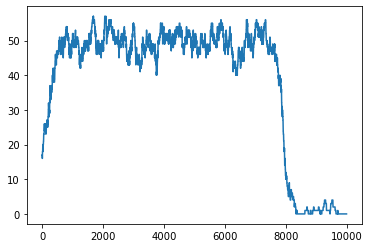

In [293]:
generate_plot(0.85)

In [294]:
def finalconfig():
    z=[]
    for i in range(60):
        choice=np.random.randint(0,2)
        if (choice==0):
            z.append(z1[i])
        else:
            z.append(1)
    return z
rep=finalconfig()
print(count_M(rep))

12


In [295]:
def pmnval(z,n):
    m=count_M(z)
    a=count_A(z)
    return (m-a)/n
def creates(n):
    z=[]
    for i in range(n):
        z.append(np.random.randint(0,3))
    return z
def move(z,N_val,alpha):
    
    # Select random nucleosome
    
    val=np.random.randint(low=0,high=N_val)
    method=genrand(alpha)
    if (method==0):
        n2=my_custom_random(val)
        if (z[n2]==z[val]):
            pass
        elif (z[n2]==2):
            if (z[val]==0):
                z[val]=1
            else:
                z[val]=2
        elif (z[n2]==0):
            if (z[val]==2):
                z[val]=1
            else:
                z[val]=0
    else:
        dirn=np.random.randint(low=0,high=2)
        if (dirn==0) and (z[val]==0):
            z[val]=1
        elif (dirn==0) and (z[val]==1):
            z[val]=2
        elif (dirn==0) and (z[val]==2):
            z[val]=1
        elif (dirn==1) and (z[val]==1):
            z[val]=0
        elif (dirn==1) and (z[val]==0):
            z[val]=1
        elif (dirn==1) and (z[val]==2):
            z[val]=1
    return pmnval(z,N_val)


In [296]:
def generate_plot(alpha,N):
    steps=10000
    step=[]
    step_m=[]
    z=creates(N)
    for i in range(10000):
        step.append(i)
        step_m.append(move(z,N,alpha))
    #plt.plot(step,step_m)
    step_m=np.array(step_m)
    return (np.mean(step_m))

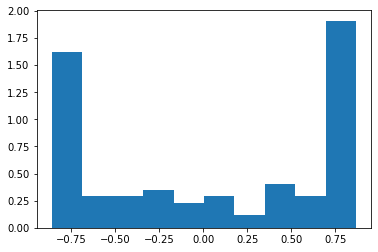

In [297]:
m_hist=[]
for i in range(100):
    v=generate_plot(ftoalpha(8),30)
    m_hist.append(v)
plt.hist(m_hist,density=True);


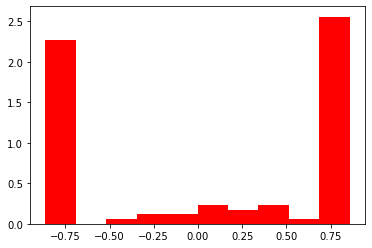

In [298]:
m_hist=[]
for i in range(100):
    v=generate_plot(ftoalpha(8),60)
    m_hist.append(v)
plt.hist(m_hist,density=True,color='red');

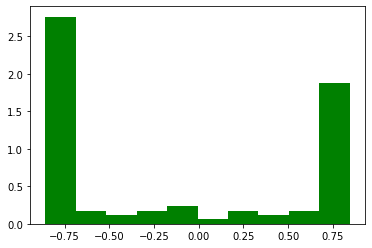

In [299]:
m_hist=[]
for i in range(100):
    v=generate_plot(ftoalpha(8),120)
    m_hist.append(v)
plt.hist(m_hist,density=True,color='green');

In [300]:
m_hist=[]
for i in range(100):
    v=generate_plot(ftoalpha(8),30)
    m_hist.append(v)
plt.hist(m_hist,density=True);
m_hist=[]
for i in range(100):
    v=generate_plot(ftoalpha(8),60)
    m_hist.append(v)
plt.hist(m_hist,density=True,color='red');
m_hist=[]
for i in range(100):
    v=generate_plot(ftoalpha(8),120)
    m_hist.append(v)
plt.hist(m_hist,density=True,color='green');
